<center><b>SOFTMAX CLASSIFICATION IN DNN USING NUMPY</b><br><center>
<hr>
<ul>
<li>https://cs231n.github.io/neural-networks-case-study/#grad</li>
<li>https://dustinstansbury.github.io/theclevermachine/derivation-backpropagation</li>
<li>https://ai.plainenglish.io/gradient-descent-update-rule-for-multiclass-logistic-regression-4bf3033cac10</li>
<li>https://blog.yani.ai/backpropagation/</li>
</ul>

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<center><b>GENERATING SAMPLE DATA</b></center>

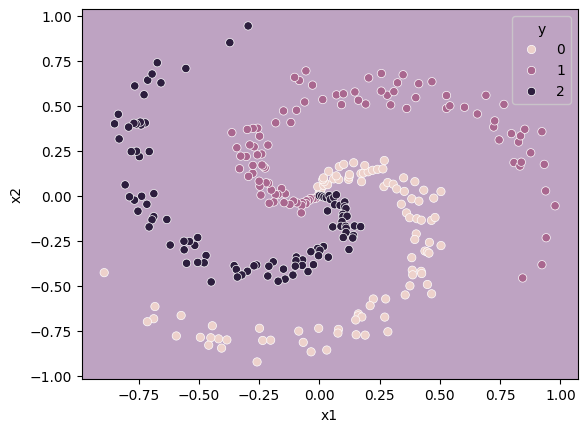

In [34]:
N = 100 # number of points per class 
D = 2 # dimensionality
K = 3 # number of classes

X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

## visualize data
data = {
    'x1': X[:,0],
    'x2': X[:,1],
    'y': y
}
plt.rcParams['axes.facecolor'] = '#bea3c2'
sns.scatterplot(x='x1', y='x2', hue='y', data=data)
plt.show()

<center><b>TRAINING A SOFTMAX LINEAR CLASSIFIER</b></center>

In [41]:
# initialize weights and biases
W = np.random.randn(K,D)*0.01
b = np.zeros((K,1))

# score calculation
scores = np.dot(W, X.T) + b

In [63]:
## Applying softmax
n_examples = X.shape[0]
exp_scores = np.exp(scores)
probs = exp_scores/np.sum(exp_scores, axis=0, keepdims=True)
probs.shape

(3, 300)

In [72]:
#hyperparameters
reg = 0.5
alpha = 0.01
step_size = 0.05

In [65]:
# loss calculation
data_loss = -np.sum(np.log(probs[y, range(n_examples)]))/n_examples
reg_loss = 0.5*reg*np.sum(W*W)
loss = data_loss + reg_loss

<center><b>BACKPROPAGATION STEP (GRADIENT CALCULATION)</b></center>

In [73]:
dscores = probs 
## writing these is the derivatives is the toughest part
dscores[y, range(n_examples)]-=1
db = np.sum(dscores, axis=1, keepdims=True)
dW = np.dot(dscores, X) + reg*W    # reg*W comes from the regularization term

W = W - step_size*dW
b = b - step_size*db

<center><b>TRAINING A LINEAR SOFTMAX LOGISTIC REGRESSION CLASSIFIER FOR MULTICLASS CLASSIFICATION</b><center>

In [93]:
%%timeit
# initialize the weights
W = 0.1*np.random.randn(D,K)
b = np.zeros((1,K))

# X dimension = (N*K,D)
# y dimension = (N*K,1)
n_examples = X.shape[0]

# declaring the hyperparameters
step_size = 1
reg = 1e-3
iterations = 200

# gradient descent loop
for iter in range(iterations):

    # calculate the scores
    scores = np.dot(X, W) + b
    
    # apply softmax
    exp_scores = np.exp(scores)
    probs = exp_scores/np.sum(exp_scores, axis=1, keepdims=True)

    # calculate loss
    loss = -np.sum(np.log(probs[range(n_examples), y]))/n_examples + 0.5*reg*np.sum(W*W)

    # calculate gradients
    dscores = probs
    dscores[range(n_examples), y] -= 1
    dscores = dscores/n_examples 

    db = np.sum(dscores, axis=0, keepdims=True)
    dW = np.dot(X.T, dscores) + reg*W 

    # perform gradient descent
    W = W - step_size*dW
    b = b - step_size*db

    #check accuracy
    scores = np.dot(X, W) + b
    predictions = np.argmax(scores, axis=1)
    accuracy = np.sum(predictions == y)/n_examples

    print(f'iteration no {iter+1}: Loss: {loss}, accuracy: {accuracy}')



iteration no 1: Loss: 1.0906241034875648, accuracy: 0.5166666666666667
iteration no 2: Loss: 1.06075292161153, accuracy: 0.5166666666666667
iteration no 3: Loss: 1.0341741746100637, accuracy: 0.52
iteration no 4: Loss: 1.0104883356437766, accuracy: 0.5233333333333333
iteration no 5: Loss: 0.989342280144734, accuracy: 0.52
iteration no 6: Loss: 0.9704252715911619, accuracy: 0.5166666666666667
iteration no 7: Loss: 0.9534651367983092, accuracy: 0.5166666666666667
iteration no 8: Loss: 0.9382243793950965, accuracy: 0.5166666666666667
iteration no 9: Loss: 0.9244963054774655, accuracy: 0.5166666666666667
iteration no 10: Loss: 0.9121012995888186, accuracy: 0.5166666666666667
iteration no 11: Loss: 0.9008833621014147, accuracy: 0.5166666666666667
iteration no 12: Loss: 0.890706972303566, accuracy: 0.5166666666666667
iteration no 13: Loss: 0.8814543008083056, accuracy: 0.5166666666666667
iteration no 14: Loss: 0.8730227665386333, accuracy: 0.5166666666666667
iteration no 15: Loss: 0.86532291

<hr>
<center><b>ACHIEVED ACCURACY OF 51.3% </b><center>
<hr>